In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv("Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df['Geography'].value_counts().to_dict()

{'France': 5014, 'Germany': 2509, 'Spain': 2477}

In [7]:
df['Geography']= df['Geography'].replace({'France': 0, 'Germany': 1, 'Spain': 3})
df


C:\Users\Kirtibala.Gujar\AppData\Local\Temp\ipykernel_9056\3263556385.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Geography']= df['Geography'].replace({'France': 0, 'Germany': 1, 'Spain': 3})


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,3,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,3,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df['Gender'].value_counts().to_dict()

{'Male': 5457, 'Female': 4543}

In [9]:
df['Gender']=df['Gender'].replace({'Male': 0, 'Female': 1})
df

C:\Users\Kirtibala.Gujar\AppData\Local\Temp\ipykernel_9056\3288462944.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']=df['Gender'].replace({'Male': 0, 'Female': 1})


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,3,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,3,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,0,42,3,75075.31,2,1,0,92888.52,1


In [63]:
ntreq=["Surname","Exited"]
x= df.drop(ntreq,axis=1)
print(x)
y = df["Exited"]
print(y)
x.shape


      RowNumber  CustomerId  CreditScore  Geography  Gender  Age  Tenure  \
0             1    15634602          619          0       1   42       2   
1             2    15647311          608          3       1   41       1   
2             3    15619304          502          0       1   42       8   
3             4    15701354          699          0       1   39       1   
4             5    15737888          850          3       1   43       2   
...         ...         ...          ...        ...     ...  ...     ...   
9995       9996    15606229          771          0       0   39       5   
9996       9997    15569892          516          0       0   35      10   
9997       9998    15584532          709          0       1   36       7   
9998       9999    15682355          772          1       0   42       3   
9999      10000    15628319          792          0       1   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0         

(10000, 12)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [49]:
stdsc= StandardScaler()
x_train= stdsc.fit_transform(x_train)
x_test = stdsc.transform(x_test)

In [64]:
x_train= x_train[:,:12]

In [65]:
x_test

array([[-0.71002341,  0.52023023, -0.61445245, ...,  0.64376017,
         0.97092256, -0.64465501],
       [ 1.4572632 ,  0.63291965, -1.2794007 , ...,  0.64376017,
        -1.02994825, -1.64334502],
       [ 0.63344486,  0.69538243, -0.11574126, ...,  0.64376017,
        -1.02994825, -0.1972733 ],
       ...,
       [ 1.60484378, -1.30643656,  0.11283471, ...,  0.64376017,
         0.97092256, -0.96791448],
       [-0.7692635 ,  1.28355263,  2.0661202 , ...,  0.64376017,
         0.97092256, -1.52131764],
       [-0.38610829,  1.44811319, -0.65601171, ...,  0.64376017,
         0.97092256,  1.55163893]])

In [54]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout, LeakyReLU,ReLU, PReLU, ELU



In [66]:

classifier= Sequential()

In [58]:
classifier.add(Dense(units=6, kernel_initializer = 'he_uniform', activation='relu',input_dim=11))
classifier.add(Dense(units=6, kernel_initializer = 'he_uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer = 'he_uniform', activation='sigmoid'))

In [59]:
classifier.compile(optimizer= 'Adamax', loss = 'binary_crossentropy', metrics=['accuracy'])

In [60]:
model_his= classifier.fit(x_train,y_train,validation_split=0.33, batch_size=10 , epochs = 100)

Epoch 1/100
536/536 [==============================] - 3s 3ms/step - loss: 0.5831 - accuracy: 0.7772 - val_loss: 0.5176 - val_accuracy: 0.7948
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5035 - accuracy: 0.7992 - val_loss: 0.5074 - val_accuracy: 0.7948
Epoch 3/100
536/536 [==============================] - 1s 3ms/step - loss: 0.5014 - accuracy: 0.7992 - val_loss: 0.5071 - val_accuracy: 0.7948
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5010 - accuracy: 0.7992 - val_loss: 0.5065 - val_accuracy: 0.7948
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5003 - accuracy: 0.7992 - val_loss: 0.5051 - val_accuracy: 0.7948
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4983 - accuracy: 0.7992 - val_loss: 0.5022 - val_accuracy: 0.7948
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4945 - accuracy: 0.7992 - val_loss: 0.4974 - val_accuracy: 0.7948

Epoch 58/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4131 - accuracy: 0.7992 - val_loss: 0.4218 - val_accuracy: 0.7948
Epoch 59/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4122 - accuracy: 0.7992 - val_loss: 0.4209 - val_accuracy: 0.7948
Epoch 60/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4112 - accuracy: 0.7992 - val_loss: 0.4205 - val_accuracy: 0.7948
Epoch 61/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4102 - accuracy: 0.7992 - val_loss: 0.4196 - val_accuracy: 0.7948
Epoch 62/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4094 - accuracy: 0.7985 - val_loss: 0.4188 - val_accuracy: 0.7948
Epoch 63/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4084 - accuracy: 0.7992 - val_loss: 0.4177 - val_accuracy: 0.8031
Epoch 64/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4077 - accuracy: 0.8001 - val_loss: 0.4172 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


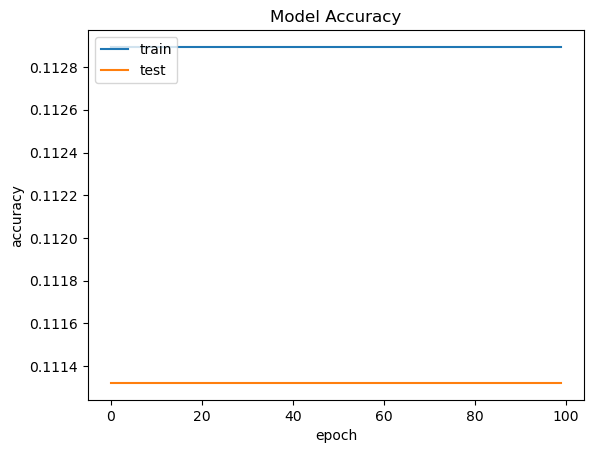

In [41]:
print(model_his.history.keys())
plt.plot(model_his.history['accuracy'])
plt.plot(model_his.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


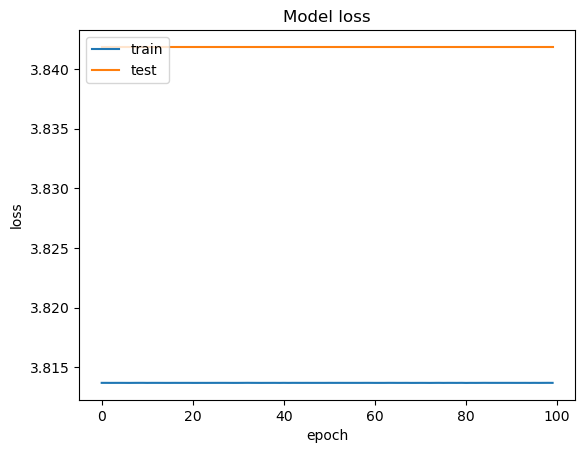

In [42]:
print(model_his.history.keys())
plt.plot(model_his.history['loss'])
plt.plot(model_his.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [69]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[False,  True, False, ...,  True,  True, False],
       [ True,  True, False, ...,  True, False, False],
       [ True,  True, False, ...,  True, False, False],
       ...,
       [ True, False, False, ...,  True,  True, False],
       [False,  True,  True, ...,  True,  True, False],
       [False,  True, False, ...,  True,  True,  True]])

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
acc_sc = accuracy_score(y_pred, y_test)

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets